In [6]:
# Cleaning up the data and formatting it.
import pandas as pd
heat = pd.read_excel('10s0379.xls')
heat = heat.set_axis(['State', 'Station', 'Length of record (years)', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Annual'], axis='columns')
heat = heat.iloc[9:80]
heat['State'] = heat['State'].fillna(method='ffill')
heat.head(10)

<ipython-input-6-4cbdc0d62837>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  heat['State'] = heat['State'].fillna(method='ffill')


,State,Station,Length of record (years),January,February,March,April,May,June,July,August,September,October,November,December,Annual
9,Alabama,Mobile,66,84,82,90,94,100,102,104,105,99,93,87,81,105
10,Alaska,Juneau,63,57,57,61,74,82,86,90,84,73,61,56,54,90
11,Arizona,Phoenix,70,88,92,100,105,113,122,121,116,118,107,95,88,122
12,Arkansas,Little Rock,66,83,85,91,95,98,105,112,109,106,97,86,80,112
13,California,Los Angeles,72,91,92,95,102,97,104,97,98,110,106,101,94,110
14,California,Sacramento,57,70,76,88,95,105,115,114,110,108,104,87,72,115
15,California,San Diego,67,88,90,93,98,96,101,99,98,111,107,97,88,111
16,California,San Francisco,80,72,78,85,92,97,106,105,100,103,99,85,75,106
17,Colorado,Denver,65,73,77,84,90,96,104,105,101,97,89,80,75,105
18,Connecticut,Hartford,53,72,73,89,96,99,100,102,102,99,91,81,76,102


####Question 1
The cities I decided to use were:
- Miami, Florida
- Los Angeles, California
- New York City, New York
- Washington D.C.
- Detroit, Michigan

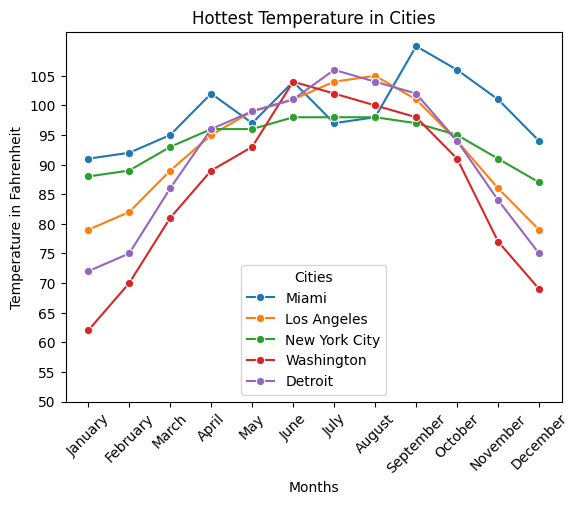

In [33]:
# Visualization 1
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

heat_months = heat.drop(['State', 'Length of record (years)', 'Annual'], axis=1)
City = ['Miami', 'Los Angeles', 'New York \\2', 'Washington', 'Detroit']
City_labels = ['Miami', 'Los Angeles', 'New York City', 'Washington', 'Detroit']

# Melt the DataFrame to convert months into a single column
heat_months_melted_partial = heat_months.loc[heat_months['Station'].isin(City)].melt(id_vars=["Station"], var_name="Months", value_name="Temperature")

ax = sns.lineplot(data=heat_months_melted_partial, x="Months", y="Temperature", hue="Station", marker='o')

plt.title("Hottest Temperature in Cities")
plt.xlabel("Months")
plt.xticks(rotation=45)
plt.ylabel("Temperature in Fahrenheit")
plt.yticks(np.arange(50, 110, 5))

# Get the handles and labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, City_labels, title='Cities')

plt.show()

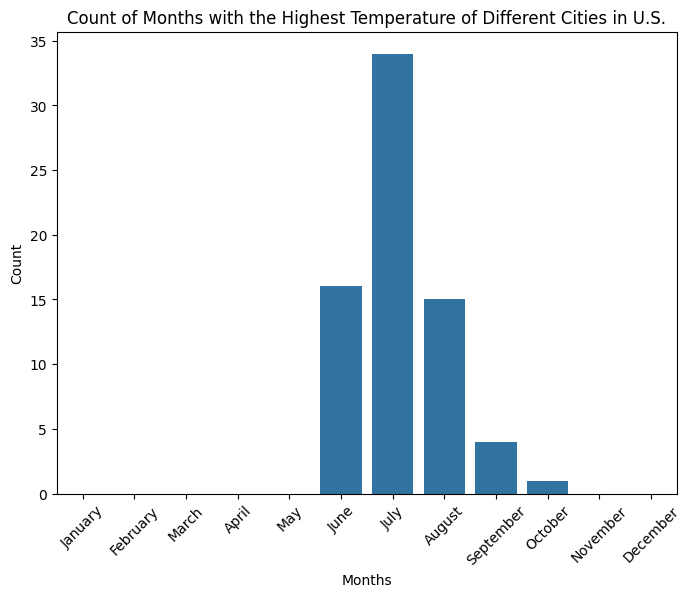

In [29]:
# Visualization 2
heat_months_melted = heat_months.melt(id_vars=["Station"], var_name="Months", value_name="Temperature")

# Load the data (assuming it's already in a DataFrame named heat_months_melted)
# Group by 'Station' and find the month with the highest temperature for each station
highest_months = pd.DataFrame(heat_months_melted.loc[heat_months_melted.groupby('Station')['Temperature'].idxmax(), 'Months'])

# Print the results
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
highest_months['Months'] = pd.Categorical(highest_months['Months'], categories=Months, ordered=True)

# Count occurrences of each month and create a new DataFrame
month_counts = highest_months['Months'].value_counts().reindex(Months, fill_value=0).reset_index()
month_counts.columns = ['Months', 'Count']

# Plot using histplot
plt.figure(figsize=(8,6))
sns.barplot(data=month_counts, x="Months", y="Count", order=Months)  # Use barplot instead of histplot

plt.xlabel("Months")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Count of Months with the Highest Temperature of Different Cities in U.S.")
plt.show()